In [584]:
import torch
print(torch.__version__)

1.0.0


In [585]:
import torchvision
print(torchvision.__version__)

0.2.1


In [586]:
import sys
print(sys.version)

3.7.2 (default, Dec 29 2018, 06:19:36) 
[GCC 7.3.0]


In [587]:
if torch.cuda.is_available():
    devID=torch.cuda.current_device()
    devID, torch.cuda.get_device_name(devID)
else:
    print("Torch Cuda not avaialbe")

Torch Cuda not avaialbe


In [588]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#device = torch.device('cpu')
device

device(type='cpu')

In [589]:
import sklearn
print(sklearn.__version__)

0.20.1


In [590]:
import pandas as pd 
import numpy as np 
import json

In [591]:
PATH ='data/'
!ls data

data_description.txt  sample_submission.csv  test.csv  train.csv


In [592]:
train = pd.read_csv(PATH+'train.csv')
TEST = pd.read_csv(PATH+'test.csv')

In [593]:
train.shape, TEST.shape

((1460, 81), (1459, 80))

In [594]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [595]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [596]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [597]:
# set target columns and remove from training dataset
house_target = train.SalePrice
house_target_desc = 'SalePrice'

#house_predictors = train.copy()
trainT = train.drop([house_target_desc], axis=1)

train_len = len(trainT)
house_predictors = pd.concat([trainT, TEST], ignore_index=True)
house_predictors.shape


(2919, 80)

In [598]:
TEST.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [599]:
house_predictors.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [600]:
#check if target has any missing values
house_target.isnull().values.any()

False

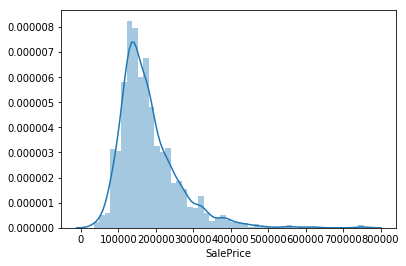

In [601]:
import seaborn as sns
%matplotlib inline
sns.distplot(house_target)

## Handling Missing Values

In [602]:
# check for any NaN values in dataset
house_predictors.isnull().values.any()

True

In [603]:
#assemble list of columns with missing values count > 0 (NaN)
missing_val_count_by_column = (house_predictors.isnull().sum())
missing_val_count_by_column=missing_val_count_by_column[missing_val_count_by_column > 0]
print(missing_val_count_by_column, "out of total dataset length:", len(house_predictors))

MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
dtype: int64 out of total dataset length: 2919


In [604]:
# find columns with missing values and count how many
missing_val_count_by_column = (house_predictors.isnull().sum())
missing_val_count_by_column=missing_val_count_by_column[missing_val_count_by_column > 0]
missing_val_count_by_column = pd.DataFrame(missing_val_count_by_column)
#missing_val_count_by_column = missing_val_count_by_column.rename(columns={'0': 'Missing'}, inplace=True)
missing_val_count_by_column['Percentage'] = missing_val_count_by_column[0]/len(house_predictors)*100
missing_val_count_by_column.columns=['Missing Values', 'Percentage']
missing_val_count_by_column

,Missing Values,Percentage
MSZoning,4,0.137033
LotFrontage,486,16.649538
Alley,2721,93.216855
Utilities,2,0.068517
Exterior1st,1,0.034258
Exterior2nd,1,0.034258
MasVnrType,24,0.822199
MasVnrArea,23,0.787941
BsmtQual,81,2.774923
BsmtCond,82,2.809181


In [605]:
missing_val_count_by_column.T.columns
house_predictors[missing_val_count_by_column.T.columns].head()

,MSZoning,LotFrontage,Alley,Utilities,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,...,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,SaleType
0,RL,65.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,...,2003.0,RFn,2.0,548.0,TA,TA,NaN,NaN,NaN,WD
1,RL,80.0,NaN,AllPub,MetalSd,MetalSd,None,0.0,Gd,TA,...,1976.0,RFn,2.0,460.0,TA,TA,NaN,NaN,NaN,WD
2,RL,68.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,...,2001.0,RFn,2.0,608.0,TA,TA,NaN,NaN,NaN,WD
3,RL,60.0,NaN,AllPub,Wd Sdng,Wd Shng,None,0.0,TA,Gd,...,1998.0,Unf,3.0,642.0,TA,TA,NaN,NaN,NaN,WD
4,RL,84.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,...,2000.0,RFn,3.0,836.0,TA,TA,NaN,NaN,NaN,WD


In [606]:
#Removing features with too many missing values, with % thresold
remove_columns = missing_val_count_by_column[missing_val_count_by_column.Percentage > 20.0]
remove_columns.T


,Alley,FireplaceQu,PoolQC,Fence,MiscFeature
Missing Values,2721.000000,1420.000000,2909.000000,2348.000000,2814.000000
Percentage,93.216855,48.646797,99.657417,80.438506,96.402878


In [607]:
for cols in remove_columns.T.columns:
    #print(cols)
    house_predictors_shrunk = house_predictors.drop([cols], axis=1)
house_predictors_shrunk.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,NaN,NaN,0,12,2008,WD,Normal


### Identifying Categorical and Conditional variables

In [608]:
#Removing as they break fit loop: 'OverallQual','BsmtCond', 'Electrical','SaleType'

cat_vars = ['Id', 'MSSubClass']#, 'MSZoning', 'Street', 'LotShape','LandContour','Utilities','LotConfig']
#            'LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','OverallCond',
#             'YearBuilt', 'YearRemodAdd', 'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual',
#              'ExterCond','Foundation','BsmtQual','BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','Heating',
#              'HeatingQC','CentralAir', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
#              'BedroomAbvGr','KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd','Functional', 'Fireplaces',
#              'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars','GarageQual','GarageCond','PavedDrive',
#              'MoSold', 'YrSold','SaleCondition']

#reducing number of categorical and cont for quick analysis
#cat_vars = ['Id', 'MSSubClass', 'MSZoning', 'Street', 'LotShape','LandContour','Utilities','LotConfig','BsmtQual']

contin_vars = ['LotFrontage','LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
              '1stFlrSF','2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea','WoodDeckSF', 'OpenPorchSF',
              'EnclosedPorch','3SsnPorch', 'ScreenPorch', 'PoolArea','MiscVal']

#contin_vars = ['LotFrontage','LotArea', 'MasVnrArea']

house_target_desc = 'SalePrice'

In [609]:
house_predictors_shrunk[cat_vars].head(40).T
# item 39 of BsmQual is Nan

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
Id,1,2,3,4,5,6,7,8,9,10,...,31,32,33,34,35,36,37,38,39,40
MSSubClass,60,20,60,70,60,50,20,60,50,190,...,70,20,20,20,120,60,20,20,20,90


In [610]:
house_predictors_shrunk[contin_vars].head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
LotFrontage,65.0,80.0,68.0,60.0,84.0,85.0,75.0,NaN,51.0,50.0,70.0,85.0,NaN,91.0,NaN,51.0,NaN,72.0,66.0,70.0
LotArea,8450.0,9600.0,11250.0,9550.0,14260.0,14115.0,10084.0,10382.0,6120.0,7420.0,11200.0,11924.0,12968.0,10652.0,10920.0,6120.0,11241.0,10791.0,13695.0,7560.0
MasVnrArea,196.0,0.0,162.0,0.0,350.0,0.0,186.0,240.0,0.0,0.0,0.0,286.0,0.0,306.0,212.0,0.0,180.0,0.0,0.0,0.0
BsmtFinSF1,706.0,978.0,486.0,216.0,655.0,732.0,1369.0,859.0,0.0,851.0,906.0,998.0,737.0,0.0,733.0,0.0,578.0,0.0,646.0,504.0
BsmtFinSF2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BsmtUnfSF,150.0,284.0,434.0,540.0,490.0,64.0,317.0,216.0,952.0,140.0,134.0,177.0,175.0,1494.0,520.0,832.0,426.0,0.0,468.0,525.0
TotalBsmtSF,856.0,1262.0,920.0,756.0,1145.0,796.0,1686.0,1107.0,952.0,991.0,1040.0,1175.0,912.0,1494.0,1253.0,832.0,1004.0,0.0,1114.0,1029.0
1stFlrSF,856.0,1262.0,920.0,961.0,1145.0,796.0,1694.0,1107.0,1022.0,1077.0,1040.0,1182.0,912.0,1494.0,1253.0,854.0,1004.0,1296.0,1114.0,1339.0
2ndFlrSF,854.0,0.0,866.0,756.0,1053.0,566.0,0.0,983.0,752.0,0.0,0.0,1142.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LowQualFinSF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [611]:
### fill in missing values

In [612]:
# are there any missing values in our categorical columns
house_predictors_shrunk[cat_vars].isnull().values.any()

False

In [613]:
# are there any missing values in our continous columns
house_predictors_shrunk[contin_vars].isnull().values.any()

True

In [614]:
# fill in unknown NaN values for selected cont columns with MEAN
for column in contin_vars:
    house_predictors[column] = house_predictors[column].fillna(0).astype('float64')
     #house_predictors_shrunk[column] = house_predictors_shrunk[column].fillna(house_predictors_shrunk[column].mean()).astype('float64')

#test to make sure
house_predictors_shrunk[column].isnull().values.any()

False

In [615]:
house_predictors_shrunk[contin_vars].head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
LotFrontage,65.0,80.0,68.0,60.0,84.0,85.0,75.0,NaN,51.0,50.0,70.0,85.0,NaN,91.0,NaN,51.0,NaN,72.0,66.0,70.0
LotArea,8450.0,9600.0,11250.0,9550.0,14260.0,14115.0,10084.0,10382.0,6120.0,7420.0,11200.0,11924.0,12968.0,10652.0,10920.0,6120.0,11241.0,10791.0,13695.0,7560.0
MasVnrArea,196.0,0.0,162.0,0.0,350.0,0.0,186.0,240.0,0.0,0.0,0.0,286.0,0.0,306.0,212.0,0.0,180.0,0.0,0.0,0.0
BsmtFinSF1,706.0,978.0,486.0,216.0,655.0,732.0,1369.0,859.0,0.0,851.0,906.0,998.0,737.0,0.0,733.0,0.0,578.0,0.0,646.0,504.0
BsmtFinSF2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BsmtUnfSF,150.0,284.0,434.0,540.0,490.0,64.0,317.0,216.0,952.0,140.0,134.0,177.0,175.0,1494.0,520.0,832.0,426.0,0.0,468.0,525.0
TotalBsmtSF,856.0,1262.0,920.0,756.0,1145.0,796.0,1686.0,1107.0,952.0,991.0,1040.0,1175.0,912.0,1494.0,1253.0,832.0,1004.0,0.0,1114.0,1029.0
1stFlrSF,856.0,1262.0,920.0,961.0,1145.0,796.0,1694.0,1107.0,1022.0,1077.0,1040.0,1182.0,912.0,1494.0,1253.0,854.0,1004.0,1296.0,1114.0,1339.0
2ndFlrSF,854.0,0.0,866.0,756.0,1053.0,566.0,0.0,983.0,752.0,0.0,0.0,1142.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LowQualFinSF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [616]:
# fill in unknown NaN values for selected cont columns with "missing"
for column in cat_vars:
    #house_predictors[column] = house_predictors[column].fillna(0).astype('float64')
     house_predictors_shrunk[column] = house_predictors_shrunk[column].fillna('missing').astype('object')

#test to make sure
house_predictors_shrunk[column].isnull().values.any()

False

In [617]:
house_predictors_shrunk[cat_vars].head(40).T
# item 39 of BsmQual NaN is changed to 'missing'

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
Id,1,2,3,4,5,6,7,8,9,10,...,31,32,33,34,35,36,37,38,39,40
MSSubClass,60,20,60,70,60,50,20,60,50,190,...,70,20,20,20,120,60,20,20,20,90


In [618]:
house_predictors_shrunk.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,NaN,NaN,0,12,2008,WD,Normal


In [619]:
# Assemble dataset with only selected cont and cat columns
#house_predictors_sml = house_predictors_shrunk[cat_vars+contin_vars+[house_target_desc]].copy()
house_predictors_sml = house_predictors_shrunk[cat_vars+contin_vars].copy()
house_predictors_sml.head()

,Id,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,1,60,65.0,8450,196.0,706.0,0.0,150.0,856.0,856,...,0,1710,548.0,0,61,0,0,0,0,0
1,2,20,80.0,9600,0.0,978.0,0.0,284.0,1262.0,1262,...,0,1262,460.0,298,0,0,0,0,0,0
2,3,60,68.0,11250,162.0,486.0,0.0,434.0,920.0,920,...,0,1786,608.0,0,42,0,0,0,0,0
3,4,70,60.0,9550,0.0,216.0,0.0,540.0,756.0,961,...,0,1717,642.0,0,35,272,0,0,0,0
4,5,60,84.0,14260,350.0,655.0,0.0,490.0,1145.0,1145,...,0,2198,836.0,192,84,0,0,0,0,0


In [620]:
pd.DataFrame(house_target).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 1 columns):
SalePrice    1460 non-null int64
dtypes: int64(1)
memory usage: 11.5 KB


In [621]:
##scaling
# Scale train data.
mean = house_predictors_sml[contin_vars].mean(axis=0)
std = house_predictors_sml[contin_vars].std(axis=0)
house_predictors_sml[contin_vars] = ( house_predictors_sml[contin_vars] - mean ) / std
house_predictors_sml[contin_vars].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,-0.184443,-0.217841,0.523038,0.580708,-0.29303,-0.934542,-0.444176,-0.773728,1.207172,-0.10118,0.413476,0.348780,-0.740634,0.199972,-0.359539,-0.103313,-0.285886,-0.063139,-0.089577
1,0.458096,-0.072032,-0.569893,1.177709,-0.29303,-0.629681,0.476948,0.261030,-0.784891,-0.10118,-0.471810,-0.059772,1.614603,-0.702722,-0.359539,-0.103313,-0.285886,-0.063139,-0.089577
2,-0.055935,0.137173,0.333448,0.097840,-0.29303,-0.288418,-0.298974,-0.610614,1.235163,-0.10118,0.563659,0.627338,-0.740634,-0.081195,-0.359539,-0.103313,-0.285886,-0.063139,-0.089577
3,-0.398622,-0.078371,-0.569893,-0.494771,-0.29303,-0.047258,-0.671053,-0.506118,0.978574,-0.10118,0.427309,0.785188,-0.740634,-0.184783,3.874303,-0.103313,-0.285886,-0.063139,-0.089577
4,0.629439,0.518814,1.381770,0.468770,-0.29303,-0.161013,0.211501,-0.037164,1.671364,-0.10118,1.377806,1.685860,0.776834,0.540332,-0.359539,-0.103313,-0.285886,-0.063139,-0.089577


In [622]:
# Scale target column data.
# mean = house_target.mean(axis=0)
# std = house_target.std(axis=0)
# house_target = ( house_target - mean ) / std
# house_target.head()

In [623]:
#assign correct data types 
for v in cat_vars:
    house_predictors_sml[v] = house_predictors_sml[v].astype('category').cat.as_ordered()
    
for v in contin_vars:
    house_predictors_sml[v] = house_predictors_sml[v].astype('float64') 
    
house_target = house_target.astype('float64')  
house_predictors_sml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 21 columns):
Id               2919 non-null category
MSSubClass       2919 non-null category
LotFrontage      2433 non-null float64
LotArea          2919 non-null float64
MasVnrArea       2896 non-null float64
BsmtFinSF1       2918 non-null float64
BsmtFinSF2       2918 non-null float64
BsmtUnfSF        2918 non-null float64
TotalBsmtSF      2918 non-null float64
1stFlrSF         2919 non-null float64
2ndFlrSF         2919 non-null float64
LowQualFinSF     2919 non-null float64
GrLivArea        2919 non-null float64
GarageArea       2918 non-null float64
WoodDeckSF       2919 non-null float64
OpenPorchSF      2919 non-null float64
EnclosedPorch    2919 non-null float64
3SsnPorch        2919 non-null float64
ScreenPorch      2919 non-null float64
PoolArea         2919 non-null float64
MiscVal          2919 non-null float64
dtypes: category(2), float64(19)
memory usage: 545.5 KB


In [624]:
type(house_predictors_sml)

pandas.core.frame.DataFrame

In [625]:
#Convert cat variables to one-hot-encoding
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for cat_col in cat_vars:
    label_encoders[cat_col] = LabelEncoder()
    house_predictors_sml[cat_col] = label_encoders[cat_col].fit_transform(house_predictors_sml[cat_col].astype(str))

In [626]:
#partition the Preprocessed Dataset Back into Train and Test Groups
# this will be used for model training and validation
train_processed = pd.concat([house_predictors_sml[:train_len]], axis=1)

# this will be used to generate the final submission
test_processed = house_predictors_sml[train_len:]

# confirm that the data looks correct
print(train_processed.shape)
print(test_processed.shape)
print(house_target.shape)

(1460, 21)
(1459, 21)
(1460,)


In [627]:
len(train_processed), len(house_target)

(1460, 1460)

In [628]:
## Spliting dataset
from sklearn.model_selection import train_test_split

# split train dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(train_processed, house_target,
                                                    train_size=0.7, random_state=42)
X_train.shape, y_test.shape

((1021, 21), (439,))

In [629]:
type(y_train)

pandas.core.series.Series

In [630]:
y_train.head()

1452    145000.0
762     215200.0
932     320000.0
435     212000.0
629     168500.0
Name: SalePrice, dtype: float64

In [631]:
# #assign correct data types 
# for v in cat_vars:
#     X_train[v] = X_train[v].astype('category').cat.as_ordered()
#     X_test[v] = X_test[v].astype('category').cat.as_ordered()

# # for v in cat_vars:
# #     X_train[v] = X_train[v].astype(str)  
# #     X_test[v] = X_test[v].astype(str)  
    
# for v in contin_vars:
#     X_train[v] = X_train[v].astype('float32') 
#     X_test[v] = X_test[v].astype('float32') 
    
# house_target = house_target.astype('float32')  
# y_train = y_train.astype('float32') 
# y_test = y_test.astype('float32') 

# #X_train[house_target_desc] = X_train[house_target_desc].astype('float32') 
    
# house_predictors_sml.info()

## Scaling

In [632]:
# # Scale train data.
# mean = X_train[contin_vars].mean(axis=0)
# std = X_train[contin_vars].std(axis=0)
# X_train[contin_vars] = ( X_train[contin_vars] - mean ) / std
# X_train[contin_vars].head()

In [633]:
# # Scale test data.
# mean = X_test[contin_vars].mean(axis=0)
# std = X_test[contin_vars].std(axis=0)
# X_test[contin_vars] = ( X_test[contin_vars] - mean ) / std
# X_test[contin_vars].head()

In [634]:
# #scale train and test target
# mean = y_train.mean(axis=0)
# std = y_train.std(axis=0)
# y_train = ( y_train - mean ) / std

# mean = y_test.mean(axis=0)
# std = y_test.std(axis=0)
# y_test = ( y_test - mean ) / std

In [635]:
# #Convert cat variables to one-hot-encoding
# from sklearn.preprocessing import LabelEncoder

# label_encoders = {}
# for cat_col in cat_vars:
#     label_encoders[cat_col] = LabelEncoder()
#     X_train[cat_col] = label_encoders[cat_col].fit_transform(X_train[cat_col].astype(str))
#     X_test[cat_col] = label_encoders[cat_col].fit_transform(X_test[cat_col].astype(str))
# #    X_train[cat_col] = label_encoders[cat_col].fit_transform(X_train[cat_col])
# #    X_test[cat_col] = label_encoders[cat_col].fit_transform(X_test[cat_col])

In [636]:
from torch.utils.data import Dataset, DataLoader
class TabularDataset(Dataset):
  def __init__(self, data,target_data, cat_cols=None):
    self.n = data.shape[0]

    self.y =  target_data.astype(np.float32).values

    self.cat_cols = cat_cols if cat_cols else []
    self.cont_cols = [col for col in data.columns
                          if col not in self.cat_cols]

    if self.cont_cols:
      self.cont_X = data[self.cont_cols].astype(np.float32).values
    else:
      self.cont_X = np.zeros((self.n, 1))

    if self.cat_cols:
      self.cat_X = data[cat_cols].astype(np.int64).values
    else:
      self.cat_X =  np.zeros((self.n, 1))

  def __len__(self):
    """
    Denotes the total number of samples.
    """
    return self.n

  def __getitem__(self, idx):
    """
    Generates one sample of data.
    """
    return [self.y[idx], self.cont_X[idx], self.cat_X[idx]]

In [637]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class FeedForwardNN(nn.Module):

  def __init__(self, emb_dims, no_of_cont, lin_layer_sizes,
               output_size, emb_dropout, lin_layer_dropouts):
    super().__init__()

    # Embedding layers
    self.emb_layers = nn.ModuleList([nn.Embedding(x, y) for x, y in emb_dims])

    no_of_embs = sum([y for x, y in emb_dims])
    self.no_of_embs = no_of_embs
    self.no_of_cont = no_of_cont

    # Linear Layers
    first_lin_layer = nn.Linear(self.no_of_embs + self.no_of_cont,
                                lin_layer_sizes[0])

    self.lin_layers =\
     nn.ModuleList([first_lin_layer] +\
          [nn.Linear(lin_layer_sizes[i], lin_layer_sizes[i + 1])
           for i in range(len(lin_layer_sizes) - 1)])
    
    for lin_layer in self.lin_layers:
      nn.init.kaiming_normal_(lin_layer.weight.data)

    # Output Layer
    self.output_layer = nn.Linear(lin_layer_sizes[-1],
                                  output_size)
    nn.init.kaiming_normal_(self.output_layer.weight.data)

    # Batch Norm Layers
    self.first_bn_layer = nn.BatchNorm1d(self.no_of_cont)
    self.bn_layers = nn.ModuleList([nn.BatchNorm1d(size)
                                    for size in lin_layer_sizes])

    # Dropout Layers
    self.emb_dropout_layer = nn.Dropout(emb_dropout)
    self.droput_layers = nn.ModuleList([nn.Dropout(size)
                                  for size in lin_layer_dropouts])

  def forward(self, cont_data, cat_data):

    if self.no_of_embs != 0:
      x = [emb_layer(cat_data[:, i])
           for i,emb_layer in enumerate(self.emb_layers)]
      x = torch.cat(x, 1)
      x = self.emb_dropout_layer(x)

    if self.no_of_cont != 0:
      normalized_cont_data = self.first_bn_layer(cont_data)

      if self.no_of_embs != 0:
        x = torch.cat([x, normalized_cont_data], 1) 
      else:
        x = normalized_cont_data

    for lin_layer, dropout_layer, bn_layer in\
        zip(self.lin_layers, self.droput_layers, self.bn_layers):
      
      x = F.relu(lin_layer(x))
      x = bn_layer(x)
      x = dropout_layer(x)

    x = self.output_layer(x)

    return x

In [638]:
#count unique values in test and train caterical
cat_dims_train=[int(X_train[col].nunique()) for col in cat_vars]
#cat_dims_test = [int(X_test[col].nunique()) for col in cat_vars]

cat_dims_trainFull = [[int(X_train[col].nunique()),col] for col in cat_vars]
cat_dims_trainFull

[[1021, 'Id'], [15, 'MSSubClass']]

In [639]:
# calculate embedding dimmenstions
emb_dims = [(x, min(50, (x + 2) // 2)) for x in cat_dims_train]

In [640]:
len(X_train), len(y_train)

(1021, 1021)

In [641]:
# instantiating TabularDataset class

# Pytorch abstract class representing a Dataset.
#All other datasets should subclass it. All subclasses should override
#``__len__``, that provides the size of the dataset, and ``__getitem__``,

train_dataset = TabularDataset(data=X_train, target_data=y_train, cat_cols=cat_vars)
test_dataset = TabularDataset(data=X_test, target_data=y_test, cat_cols=cat_vars)

In [642]:
batchsize = 8
train_dataloader = DataLoader(train_dataset, batchsize, shuffle=True, num_workers=1)
test_dataloader = DataLoader(test_dataset, batchsize, shuffle=True, num_workers=1)

In [643]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [644]:
model = FeedForwardNN(emb_dims, no_of_cont=len(train_dataset.cont_cols), 
                      lin_layer_sizes=[50, 100],
                      output_size=1, emb_dropout=0.04,
                      lin_layer_dropouts=[0.001,0.01])
model = model.to(device)
model

FeedForwardNN(
  (emb_layers): ModuleList(
    (0): Embedding(1021, 50)
    (1): Embedding(15, 8)
  )
  (lin_layers): ModuleList(
    (0): Linear(in_features=77, out_features=50, bias=True)
    (1): Linear(in_features=50, out_features=100, bias=True)
  )
  (output_layer): Linear(in_features=100, out_features=1, bias=True)
  (first_bn_layer): BatchNorm1d(19, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn_layers): ModuleList(
    (0): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (emb_dropout_layer): Dropout(p=0.04)
  (droput_layers): ModuleList(
    (0): Dropout(p=0.001)
    (1): Dropout(p=0.01)
  )
)

In [645]:
no_of_epochs = 80
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [646]:
import os
import time
import copy

since = time.time()

best_model_wts = copy.deepcopy(model.state_dict())
best_acc = 0.0
best_tst_loss = 1e20
train_losses, test_losses = [],[]

for epoch in range(no_of_epochs):
    running_loss = 0.0
    running_train_corrects = 0.0
    
    # TRAINING PHASE
    i=0
    #print('Epoch {}/{}'.format(epoch, no_of_epochs - 1))
    model.train()  # Set model to training mode
    pid = os.getpid()
    for y, cont_x, cat_x in train_dataloader:
        i += 1
        cat_x = cat_x.to(device)
        cont_x = cont_x.to(device)
        y  = y.to(device)
        
        print(len(cont_x), len(cat_x), len(y))
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # Forward Pass
        preds = model(cont_x, cat_x)
        loss = criterion(preds, y)
        #loss2 = torch.sqrt(criterion(torch.log(preds), torch.log(y)))
        #print(loss.item(), loss2.item())
        
        # Backward Pass and Optimization
        loss.backward()
        optimizer.step()
        
        # statistics
        running_loss += loss.item() * cat_x.size(0)  #multiple by batch size
        #running_loss += loss.item()  
        
        #running_train_corrects += torch.sum(preds == y.data).float()
        #print(running_loss)
        
        # print statistics
        #if i % 1000:    # print every n mini-batches         
         #   print('{}\tTrain Epoch: {} [{}/{} ({:.0f}%)] Loss: {:.4f}'.format(
        #        pid, epoch, i * len(cat_x), len(dataloader.dataset),
        #        100. * i / len(dataloader), loss.item()))
    
    # TESTING PHASE
    model.eval()   # Set model to evaluate mode
    running_corrects = 0
    test_loss = 0
    test_loss2 = 0
    correct = 0
    i = 0
    for y, cont_x, cat_x in test_dataloader:
        i += 1
        cat_x = cat_x.to(device)
        cont_x = cont_x.to(device)
        y  = y.to(device)
        
        # zero the parameter gradients
        optimizer.zero_grad()
        

        
        #with torch.set_grad_enabled(False):
        with torch.no_grad():
            preds = model(cont_x, cat_x)
            loss = criterion(preds, y)
            #test_loss = torch.sqrt(criterion(torch.log(preds), torch.log(y)))
            #test_loss += torch.sqrt(criterion(torch.log(preds), torch.log(y)))
            #print(test_loss)
            #print(preds[0],y[0])
        
        #test_loss2 += F.nll_loss(preds, y, reduction='sum').item() # sum up batch loss
        #test_loss2  = 0
        #prd = preds.max(1)[1] # get the index of the max log-probability
        #correct += prd.eq(y).sum().item()
        
        #running_corrects += torch.sum(preds == y.data).float()
        #running_corrects+=accuracy_score(y, preds)*100
        test_loss += loss.item() * cat_x.size(0)   #cat_x.zize(0) - batch size of 64=       
    
    epoch_train_loss = running_loss / len(train_dataset)
    #epoch_train_loss = running_loss / cat_x.size(0)
    #epoch_train_acc = running_train_corrects / len(train_dataset)
    
    #epoch_acc = running_corrects.double() / len(test_dataset)
    epoch_test_loss = test_loss / len(test_dataset)
    #epoch_test_loss = test_loss
    
    #print("test_loss2", test_loss2/ len(test_dataloader.dataset))
    #print( 'Accuracy: {}/{}'.format(correct, len(test_dataloader.dataset)))
    
    #epoch_loss = running_loss / dataset_sizes[phase]
    #epoch_acc = running_corrects.double() / dataset_sizes[phase]
    
    # deep copy the model
    if epoch_test_loss < best_tst_loss:
        best_tst_loss = epoch_test_loss
        best_model_wts = copy.deepcopy(model.state_dict())
        # this idea didn't work
 #   else: #always start new epoch with lowest loss
 #       model.load_state_dict(best_model_wts)
    
    train_losses.append(epoch_train_loss)
    test_losses.append(epoch_test_loss)
    
#    print('Epoch {}/{}, Train Loss: {:.6f}, Train Acc:{:.6f}, Test Loss: {:.6f} Acc: {:.6f}'.
#           format(epoch, no_of_epochs - 1, epoch_train_loss, epoch_train_acc, epoch_test_loss, epoch_acc))
    print('Epoch {}/{}, Train Loss: {:.6f}, Test Loss: {:.6f}'.
          format(epoch, no_of_epochs - 1, epoch_train_loss, epoch_test_loss))
    
# load best model weights
model.load_state_dict(best_model_wts)
print("Best Test Loss: ", best_tst_loss)

8 8 8


RuntimeError: index out of range at /opt/conda/conda-bld/pytorch-cpu_1544218667092/work/aten/src/TH/generic/THTensorEvenMoreMath.cpp:191

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
plt.plot(train_losses,label = "Train losses")
plt.legend()

In [ ]:
plt.plot(train_losses,label = "Train losses")
plt.plot(test_losses, label = "Test losses")
plt.legend()

In [ ]:
# plt.ylim(bottom=0.6e10,top=0.75e10)
plt.ylim(bottom=0.997,top=1.007)
plt.plot(train_losses,label = "Train losses")
plt.plot(test_losses, label = "Test losses")
plt.legend()

In [ ]:
#Test = torch.from_numpy(Test.values).float()
#Test.head()

with torch.no_grad():
    model.eval()
    output = model.forward(Test[contin_vars], Test[cat_vars])

output.shape
